## ARQUITETURA

<p> 1) RAJPURKAR, Pranav et. al. Cardiologist-Level Arrhythmia Detection with Convolutional Neural Networks</p>

Importando bibliotecas

In [2]:
#Bibliotecas básicas
import numpy as np
from numpy import load
import matplotlib.pyplot as plt

#Biblioteca para rede neural
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense, Activation, ReLU, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import backend as K

#Bibliotecas para visualizar o modelo keras 
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot



KeyboardInterrupt



Baixando os dados

In [2]:
data = np.load('data.npz')

Criando os conjuntos de treinamento e de teste

In [3]:
#Conjunto de treinamento
X_train = data['X_train']
y_train = data['y_train']
#Conjunto de teste
X_test = data['X_test']
y_test = data['y_test']

Resumo

In [4]:
#Sumário
print("\tDIMENSÕES \n-------------------------")
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print("-------------------------")
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')
print("-------------------------")
print("\tSUMÁRIO \n-------------------------")
print(f"Total de exemplos de treinamento = {X_train.shape[0]}")
print(f"Total de exemplos de teste = {X_test.shape[0]}")
print(f"Total de amostras = {X_train.shape[1]}")

	DIMENSÕES 
-------------------------
X_train = (19267, 1000, 12)
y_train = (19267,)
-------------------------
X_test = (2163, 1000, 12)
y_test = (2163,)
-------------------------
	SUMÁRIO 
-------------------------
Total de exemplos de treinamento = 19267
Total de exemplos de teste = 2163
Total de amostras = 1000


Definindo dimensões

In [5]:
input_shape=(1000, 12)
print(f"Input shape = {input_shape}")

Input shape = (1000, 12)


**DESENVOLVIMENTO DA REDE**

In [6]:
rate_drop = 0.5

In [7]:
initializer='he_normal'

In [8]:
K.clear_session()

In [9]:
#Camada de entrada
input_1 = Input(shape=input_shape)

Primeiro bloco

In [10]:
num_filter = 64

conv_1 = Conv1D(kernel_size=16, strides=1, filters=num_filter,padding="same",kernel_initializer=initializer)(input_1)
bn_1 = BatchNormalization()(conv_1)
relu_1 = ReLU()(bn_1)

Primeiro bloco residual  
Stride = 2  
Filtros = 64

In [11]:
#Bloco residual
conv_2 = Conv1D(kernel_size=16,filters=num_filter,strides=1,padding="same",kernel_initializer=initializer)(relu_1)
bn_2 = BatchNormalization()(conv_2)
relu_2 = ReLU()(bn_2)
drop_1 = Dropout(rate_drop)(relu_2)
conv_3 = Conv1D(kernel_size = 16, filters=num_filter,strides=2,padding="same",kernel_initializer=initializer)(drop_1)

#Short connection
short_1 = MaxPooling1D(pool_size=1, strides=2)(relu_1)

#Adicionando camadas
add_1 = Add()([conv_3, short_1])

Segundo bloco residual  
Stride = 1  
Filtros = 64

In [12]:
#Bloco residual
bn_3 = BatchNormalization()(add_1)
relu_3 = ReLU()(bn_3)
drop_2 = Dropout(rate_drop)(relu_3)
conv_4 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_2)
bn_4 = BatchNormalization()(conv_4)
relu_4 = ReLU()(bn_4)
drop_3 = Dropout(rate_drop)(relu_4)
conv_5 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_3)

#Short connection
short_2 = MaxPooling1D(pool_size=1, strides=1)(add_1)

#Adicionando camadas
add_2 = Add()([conv_5, short_2])

Terceiro bloco residual  
Stride = 2  
Filtros = 64

In [13]:
#Bloco residual
bn_5 = BatchNormalization()(add_2)
relu_5 = ReLU()(bn_5)
drop_4 = Dropout(rate_drop)(relu_5)
conv_6 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_4)
bn_6 = BatchNormalization()(conv_6)
relu_6 = ReLU()(bn_6)
drop_5 = Dropout(rate_drop)(relu_6)
conv_7 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_5)

#Short connection
short_3 = MaxPooling1D(pool_size = 1, strides=2)(add_2)

#Adição dos blocos
add_3 = Add()([conv_7, short_3])

Quarto bloco residual  
Stride = 1  
Filtros = 64

In [14]:
#Bloco residual
bn_7 = BatchNormalization()(add_3)
relu_7 = ReLU()(bn_7)
drop_6 = Dropout(rate_drop)(relu_7)
conv_8 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_6)
bn_8 = BatchNormalization()(conv_8)
relu_8 = ReLU()(bn_8)
drop_7 = Dropout(rate_drop)(relu_8)
conv_9 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_7)

#Short connection
short_4 = MaxPooling1D(pool_size = 1, strides=1)(add_3)

#Adição dos blocos
add_4 = Add()([conv_9, short_4])

Quinto bloco residual  
Stride = 2  
Filtros = 128

In [15]:
num_filter = 128

#Bloco residual
bn_9 = BatchNormalization()(add_4)
relu_9 = ReLU()(bn_9)
drop_8 = Dropout(rate_drop)(relu_9)
conv_10 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_8)
bn_10 = BatchNormalization()(conv_10)
relu_10 = ReLU()(bn_10)
drop_9 = Dropout(rate_drop)(relu_10)
conv_11 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_9)

#Short connection
conv_aj5 = Conv1D(kernel_size=16,filters=num_filter,strides=1,padding="same")(add_4) #Ajustar o número de filtros para adicionar depois o Max ao conv_11
short_5 = MaxPooling1D(pool_size = 1, strides=2)(conv_aj5)

#Adição dos blocos
add_5 = Add()([conv_11, short_5])

Sexto bloco residual  
Stride = 1  
Filtros = 128

In [16]:
#Bloco residual
bn_11 = BatchNormalization()(add_5)
relu_11 = ReLU()(bn_11)
drop_9 = Dropout(rate_drop)(relu_11)
conv_12 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_9)
bn_12 = BatchNormalization()(conv_12)
relu_12 = ReLU()(bn_12)
drop_10 = Dropout(rate_drop)(relu_12)
conv_13 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_10)

#Short connection
short_6 = MaxPooling1D(pool_size = 1, strides=1)(add_5)

#Adição dos blocos
add_6 = Add()([conv_13, short_6])

Sétimo bloco residual  
Strides = 2  
Filtros = 128

In [17]:
#Bloco residual
bn_13 = BatchNormalization()(add_6)
relu_13 = ReLU()(bn_13)
drop_11 = Dropout(rate_drop)(relu_13)
conv_14 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_11)
bn_14 = BatchNormalization()(conv_14)
relu_14 = ReLU()(bn_14)
drop_12 = Dropout(rate_drop)(relu_14)
conv_15 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_12)

#Short connection
short_7 = MaxPooling1D(pool_size = 1, strides=2)(add_6)

#Adição dos blocos
add_7 = Add()([conv_15, short_7])

Oitavo bloco residual  
Stride = 1  
Filtros = 128

In [18]:
#Bloco residual
bn_15 = BatchNormalization()(add_7)
relu_15 = ReLU()(bn_15)
drop_13 = Dropout(rate_drop)(relu_15)
conv_16 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_13)
bn_16 = BatchNormalization()(conv_16)
relu_16 = ReLU()(bn_16)
drop_14 = Dropout(rate_drop)(relu_16)
conv_17 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_14)

#Short connection
short_8 = MaxPooling1D(pool_size = 1, strides=1)(add_7)

#Adição dos blocos
add_8 = Add()([conv_17, short_8])

Nono bloco residual  
Stride = 2  
Filtros = 192

In [19]:
num_filter = 192

#Bloco residual
bn_17 = BatchNormalization()(add_8)
relu_17 = ReLU()(bn_17)
drop_15 = Dropout(rate_drop)(relu_17)
conv_18 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_15)
bn_18 = BatchNormalization()(conv_18)
relu_18 = ReLU()(bn_18)
drop_16 = Dropout(rate_drop)(relu_18)
conv_19 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same")(drop_16)

#Short connection
conv_aj17 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same")(add_8)
short_9 = MaxPooling1D(pool_size = 1, strides=2)(conv_aj17)

#Adição dos blocos
add_9 = Add()([conv_19, short_9])

Décimo bloco residual  
Stride = 1  
Filtros = 192

In [20]:
#Bloco residual
bn_19 = BatchNormalization()(add_9)
relu_19 = ReLU()(bn_19)
drop_17 = Dropout(rate_drop)(relu_19)
conv_20 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_17)
bn_20 = BatchNormalization()(conv_20)
relu_20 = ReLU()(bn_20)
drop_18 = Dropout(rate_drop)(relu_20)
conv_21 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_18)

#Short connection
short_10 = MaxPooling1D(pool_size = 1, strides=1)(add_9)

#Adição dos blocos
add_10 = Add()([conv_21, short_10])

Décimo primeiro bloco residual  
Stride = 2  
Filtros = 192

In [21]:
#Bloco residual
bn_21 = BatchNormalization()(add_10)
relu_21 = ReLU()(bn_21)
drop_19 = Dropout(rate_drop)(relu_21)
conv_22 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_19)
bn_22 = BatchNormalization()(conv_22)
relu_22 = ReLU()(bn_22)
drop_20 = Dropout(rate_drop)(relu_22)
conv_23 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_20)

#Short connection
short_11 = MaxPooling1D(pool_size = 1, strides=2)(add_10)

#Adição dos blocos
add_11 = Add()([conv_23, short_11])

Décimo segundo bloco residual  
Strides = 1  
Filtros = 192

In [22]:
#Bloco residual
bn_23 = BatchNormalization()(add_11)
relu_23 = ReLU()(bn_23)
drop_21 = Dropout(rate_drop)(relu_23)
conv_24 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_21)
bn_24 = BatchNormalization()(conv_24)
relu_24 = ReLU()(bn_24)
drop_22 = Dropout(rate_drop)(relu_24)
conv_25 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_22)

#Short connection
short_12 = MaxPooling1D(pool_size = 1, strides=1)(add_11)

#Adição dos blocos
add_12 = Add()([conv_25, short_12])

Décimo terceiro bloco residual  
Strides = 2  
Filtros = 256

In [23]:
num_filter = 256

#Bloco residual
bn_25 = BatchNormalization()(add_12)
relu_25 = ReLU()(bn_25)
drop_23 = Dropout(rate_drop)(relu_25)
conv_26 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_23)
bn_26 = BatchNormalization()(conv_26)
relu_26 = ReLU()(bn_26)
drop_24 = Dropout(rate_drop)(relu_26)
conv_27 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_24)

#Short connection
conv_aj27 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same")(add_12)
short_13 = MaxPooling1D(pool_size = 1, strides=2)(conv_aj27)

#Adição dos blocos
add_13 = Add()([conv_27, short_13])

Décimo quarto bloco residual  
Stride = 1  
Filtros = 256

In [24]:
#Bloco residual
bn_27 = BatchNormalization()(add_13)
relu_27 = ReLU()(bn_27)
drop_25 = Dropout(rate_drop)(relu_27)
conv_28 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_25)
bn_28 = BatchNormalization()(conv_28)
relu_28 = ReLU()(bn_28)
drop_26 = Dropout(rate_drop)(relu_28)
conv_29 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_26)

#Short connection
short_14 = MaxPooling1D(pool_size = 1, strides=1)(add_13)

#Adição dos blocos
add_14 = Add()([conv_29, short_14])

Décimo quinto bloco residual  
Stride = 2  
Filtros = 256

In [25]:
#Bloco residual
bn_29 = BatchNormalization()(add_14)
relu_29 = ReLU()(bn_29)
drop_27 = Dropout(rate_drop)(relu_29)
conv_30 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_27)
bn_30 = BatchNormalization()(conv_30)
relu_30 = ReLU()(bn_30)
drop_28 = Dropout(rate_drop)(relu_30)
conv_31 = Conv1D(kernel_size=16, filters=num_filter, strides=2, padding="same",kernel_initializer=initializer)(drop_28)

#Short connection
short_15 = MaxPooling1D(pool_size = 1, strides=2)(add_14)

#Adição dos blocos
add_15 = Add()([conv_31, short_15])

Décimo sexto bloco residual  
Stride = 2  
Filtros = 256

In [26]:
#Bloco residual
bn_31 = BatchNormalization()(add_15)
relu_31 = ReLU()(bn_31)
drop_29 = Dropout(rate_drop)(relu_31)
conv_32 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_29)
bn_32 = BatchNormalization()(conv_32)
relu_32 = ReLU()(bn_32)
drop_30 = Dropout(rate_drop)(relu_32)
conv_33 = Conv1D(kernel_size=16, filters=num_filter, strides=1, padding="same",kernel_initializer=initializer)(drop_30)

#Short connection
short_16 = MaxPooling1D(pool_size = 1, strides=1)(add_15)

#Adição dos blocos
add_16 = Add()([conv_33, short_16])

Último bloco da rede

In [27]:
#Últimas camadas
bn_33 = BatchNormalization()(add_16)
relu_33 = ReLU()(bn_33)
flat = Flatten()(relu_33)
dense_1 = Dense(32)(flat)
classification = Dense(2, activation='softmax')(dense_1)

In [28]:
#Criando modelo
model = Model(inputs=input_1,outputs=classification)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000, 12)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1000, 64)     12352       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1000, 64)     256         conv1d[0][0]                     
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 1000, 64)     0           batch_normalization[0][0]        
______________________________________________________________________________________________

**TREINANDO O MODELO**

In [29]:
#Parâmetros de otimização
lr = 0.001
epochs = 10
batch_size = 32

In [30]:
#Otimizador Adam
opt = Adam(lr, beta_1=0.9, beta_2=0.999)

In [31]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [32]:
callbacks = []

#Reduz a taxa de aprendizagem quando o erro de validação para de melhorar
callbacks.append(ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=lr/10000))

In [33]:
#Treino do modelo
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=callbacks)

Train on 19267 samples, validate on 2163 samples
Epoch 1/10
19267/19267 [==============================] - 98s 5ms/sample - loss: 0.4325 - accuracy: 0.8053 - val_loss: 0.8904 - val_accuracy: 0.7074
Epoch 2/10
19267/19267 [==============================] - 83s 4ms/sample - loss: 0.3497 - accuracy: 0.8430 - val_loss: 0.9883 - val_accuracy: 0.8054
Epoch 3/10
19267/19267 [==============================] - 83s 4ms/sample - loss: 0.3306 - accuracy: 0.8536 - val_loss: 0.5273 - val_accuracy: 0.7966
Epoch 4/10
19267/19267 [==============================] - 83s 4ms/sample - loss: 0.3185 - accuracy: 0.8632 - val_loss: 0.4957 - val_accuracy: 0.8091
Epoch 5/10
19267/19267 [==============================] - 83s 4ms/sample - loss: 0.3059 - accuracy: 0.8660 - val_loss: 0.3333 - val_accuracy: 0.8400
Epoch 6/10
19267/19267 [==============================] - 83s 4ms/sample - loss: 0.3014 - accuracy: 0.8685 - val_loss: 0.3725 - val_accuracy: 0.8567
Epoch 7/10
19267/19267 [==============================] -

**AVALIANDO O TREINAMENTO**

In [34]:
loss_train = history.history['loss']
accuracy_train = history.history['accuracy']

loss_val = history.history['val_loss']
accuracy_val = history.history['val_accuracy']

epochs = history.epoch

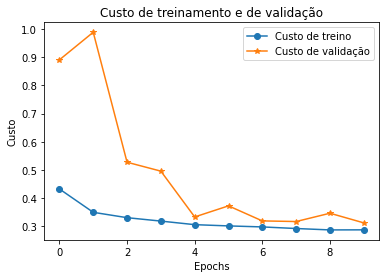

In [35]:
plt.plot(epochs, loss_train, '-o')
plt.plot(epochs, loss_val, '-*')

plt.title('Custo de treinamento e de validação')
plt.xlabel('Epochs')
plt.ylabel('Custo')
plt.legend(['Custo de treino', 'Custo de validação'])
local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Gráficos/Custo'
plt.savefig(local)
plt.show()

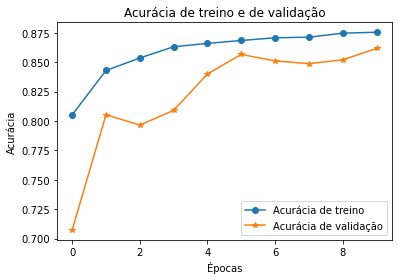

In [36]:
plt.plot(epochs, accuracy_train, '-o')
plt.plot(epochs, accuracy_val, '-*')

plt.title('Acurácia de treino e de validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Acurácia de treino', 'Acurácia de validação'])
local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Gráficos/Acuracia'
plt.savefig(local)
plt.show()

In [37]:
score = model.evaluate(X_test, y_test)
print(f"Custo de teste = {score[0]:.4f}")
print(f"Acurácia de teste = {100*score[1]:.2f}%")

2163/2163 [==============================] - 2s 1ms/sample - loss: 0.3122 - accuracy: 0.8618
Custo de teste = 0.3122
Acurácia de teste = 86.18%


In [38]:
classification = ['Anormal','Normal']

In [39]:
pred = model.predict(X_test)

In [40]:
pred_classification = np.array(classification)[pred.argmax(axis=-1)]

In [41]:
print(pred)
print(pred_classification)

[[0.06256855 0.93743145]
 [0.55173033 0.44826967]
 [0.26125517 0.73874485]
 ...
 [0.75824493 0.24175507]
 [0.8503535  0.14964648]
 [0.977032   0.02296802]]
['Normal' 'Anormal' 'Normal' ... 'Anormal' 'Anormal' 'Anormal']


------------------------------------------------------------------------  

**Teste das métricas:**    
Accuracy 
Precision  
Recall  
F1

In [42]:
pred_bin = []
for i in range(len(pred_classification)):
    if pred_classification[i] == 'Normal':
        pred_bin.append(1)
    else:
        pred_bin.append(0)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [44]:
acc_teste = accuracy_score(y_test, pred_bin)
precision = precision_score(y_test, pred_bin)
recall = recall_score(y_test, pred_bin)
f1 = f1_score(y_test, pred_bin, average='macro')

In [45]:
f1 = 2 * ((0.6550783912747103 * 0.9968879668049793)/(0.6550783912747103 + 0.9968879668049793))
f1

0.7906211435623199

In [46]:
print(f"Accuracy: {acc_teste}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.8617660656495608
Precision: 0.8163653663177926
Recall: 0.8900414937759336
F1 Score: <function f1_score at 0x0000017FE8BAA678>


In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1199
           1       0.82      0.89      0.85       964

    accuracy                           0.86      2163
   macro avg       0.86      0.86      0.86      2163
weighted avg       0.87      0.86      0.86      2163



  --------------------------------------------------------

 Visualização da previsão de um exemplo

In [49]:
import matplotlib.pyplot as plt

index: 100
pred = [0.98212653 0.01787349]


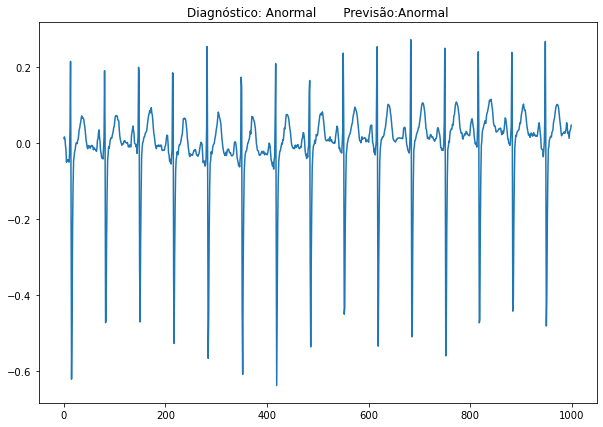

In [52]:
index = 100
    
print(f'index: {index}')
print("pred =",pred[index])   #Valores das "probabilidades" para cada categoria

pred_classification = np.array(classification)[pred.argmax(axis=-1)]  

if y_test[index]==1:
    title = "Normal"
else:
    title = "Anormal"
    
valor_med = X_test[index, ].mean(axis=-1)
fig_s, ax_s = plt.subplots(figsize=(10,7))
ax_s.set_title(f'Diagnóstico: {title}       Previsão:{pred_classification[index]}')
ax_s.plot(valor_med)
plt.show()

Visualização da matriz de confusão

In [53]:
import numpy
from sklearn import metrics
import itertools

In [54]:
y_test_nome = []
for i in range(len(y_test)):
    if y_test[i]==1:
        y_test_nome.append("Normal")
    else:
        y_test_nome.append("Anormal")
    
y_test_nome = numpy.array(y_test_nome)

In [55]:
cm = metrics.confusion_matrix(y_true=y_test_nome,y_pred=pred_classification)

In [56]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    local = 'E:/Usuários/Sarah/Documentos/UTFPR/TCC/Resultados/Gráficos/Matrix'
    plt.savefig(local)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
cm_plot_labels = ['ECG Anormal','ECG Normal']

Confusion matrix, without normalization
[[1006  193]
 [ 106  858]]


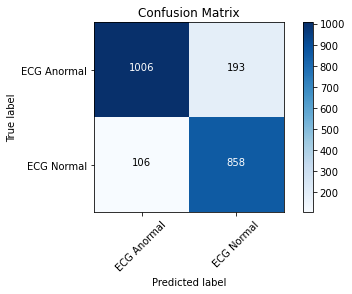

In [58]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')